In [13]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore
import csv



DeSeqOutputAllConds = 'DeSeqOutputAllConds.tsv'
si2_si4_RNA_seq = 'si2-si4_RNA-seq-pipeline-output-normalized.tsv'
le = LabelEncoder()
oh_enc = OneHotEncoder(handle_unknown='ignore')
plsr = PLSRegression(n_components=2)
pca = PCA(n_components=2)

def getTSVFile(filepath):
    data = pd.read_csv (filepath, sep = '\t')
    return data

#not used or necessary
def integerEncode(dataframe, columnNametoEncode, newEncodedColumnName):
    dataframe[columnNametoEncode] = le.fit_transform(df[newEncodedColumnName])
    return dataframe
  
#https://stackoverflow.com/questions/37292872/how-can-i-one-hot-encode-in-python  
def oneHotEncode(df, columnsToEncode):
    
    for column in columnsToEncode:
        # Get one hot encoding of column and drop 'column'
        one_hot = pd.get_dummies(df[column], drop_first=True)
        # Drop column  as it is now encoded
        df = df.drop(column, axis = 1)
        # Join the encoded df
        df = df.join(one_hot)
    
    return df


def zScoreData(df, columnsToZScore):
    for column in columnsToZScore:
        df[column] = zscore(df[column])
        
    return df

def fixBadChromosomeLabeling(df, column='chrom'): 
    replace = list(range(1, 23)) + ['X', 'Y']
    
    for i in replace:
        df[column].replace(str(i), 'chr' + str(i), inplace=True)
        
    return df

# one hot encode the genes. when they are numbers they wont disappear using groupby
# groupby samplid
# remove unnecessary columns
# transpose the dataframe to switch rows and columns so genes are the rows
# sort by tpm and then get top n results. So you have top 20 genes.
# transpose it back and now you have top 20 columns

In [2]:
df = getTSVFile(si2_si4_RNA_seq)

sampleIDList = df.sampleID.unique()
gene_nameList = df.gene_name.unique()
#df['sampleID']
print(sampleIDList.size)
print(gene_nameList.size)

37
27311


In [28]:
df_tpm = pd.read_csv('tpmdata2.csv', delimiter = ',')
df_counts = pd.read_csv('countsdata.csv', delimiter = ',')
print(df_tpm.shape)
df_tpm = df_tpm.set_index('Unnamed: 0')
df_counts = df_counts.set_index('Unnamed: 0')

(37, 16384)


In [35]:
df_tpm = pd.DataFrame(index = sampleIDList ,columns = gene_nameList) # tpm
df_counts = pd.DataFrame(index = sampleIDList ,columns = gene_nameList) # counts
for r in range(0, sampleIDList.size):
    for c in range(0, gene_nameList.size):
        df3 = df[(df['sampleID'] == sampleIDList[r]) & (df['gene_name'] == gene_nameList[c])]
        df_tpm.at[sampleIDList[r], gene_nameList[c]] = df3.iat[0,6] #tpm is at [0,6]
        df_counts.at[sampleIDList[r], gene_nameList[c]] = df3.iat[0,3] #counts at [0,3]

        

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36


,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,AC093762.3,AL109936.8,AC068987.5,AP002512.4,OR4F29,AL139424.3,BX005132.2,AL139254.3,AL591163.1,AL589702.1
01-TGFb-low,20.341,0,376.074,14.1101,13.2426,0,0,107.807,38.4994,56.6312,...,0,0,0,0,0,0.730994,0,0,0.705368,0
02-TGFb-med,23.517,0,366.791,13.3025,12.4711,0,0,105.345,38.9402,55.9694,...,0,1.70327,0,0,0,1.00818,0,0,0,0
03-RA-low,13.4156,0,377.729,15.5238,21.348,0,0,141.453,34.0126,51.2853,...,0,0.629553,0,0,0,1.43732,0,0,0,0
04-EtOH-highDensity,15.1332,0,374.781,12.8655,10.6357,0,0,120.877,33.7887,51.1198,...,0,1.83264,0,0,0,0.774827,0,0,0,0
05-EtOH-nlDensity,16.4911,0,372.564,14.7826,14.3086,0,0,142.042,36.9407,52.1341,...,0,0.531414,0,0,0,0.674033,0,0,0,0
06-RA-high,14.1619,0,349.989,16.7656,26.3037,0,0,134.771,33.3178,44.1585,...,0,0.568617,0,0,0,0.288488,0,0,0,0
07-EtOH-halfDensity,16.4414,0,372.429,13.8013,14.2379,0.103187,0,145.673,39.2653,50.1351,...,0,0.593494,0,0,0,0.903327,0,0,0,0
08-TGFb-and-RA-low,26.3584,0,364.614,15.0214,25.7656,0.110638,0,113.945,36.7417,57.3864,...,0,1.27271,0,0,0,0.968562,0,0,0,0
09-TGFb-and-RA-med,27.5518,0,336.096,15.9436,29.6187,0,0,111.251,33.2189,57.699,...,0,0,0,0,0,0.863106,0,0,0,0
10-TGFb-high,22.0781,0,361.858,12.5421,11.4287,0,0,101.335,36.8432,56.165,...,0,1.9579,0,0,0,1.15889,0,0,0,0


In [24]:
pca = PCA(n_components = 3)
X_r = pca.fit_transform(df_tpm)
#pca.components_
print(pca.components_[:,0]) #PC1 loadings
print(pca.components_.shape)
print(X_r[3, :])# scores for first data point
print(pca.explained_variance_ratio_)

[ 0.00110189 -0.00120758 -0.00135517]
(3, 16383)
[-3116.58201621    32.16863139  -774.67629636]
[0.45937105 0.3875882  0.06280008]


[0.45937105 0.3875882  0.06280008]


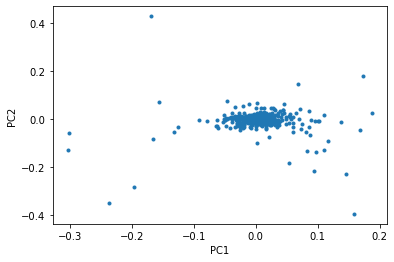

In [25]:
#for i in range(pca.components_.shape[1]):
#    plt.scatter(pca.components_[0, i], pca.components_[1, i], label=df2.columns[i]) 

plt.xlabel('PC1')
plt.ylabel('PC2')
print(pca.explained_variance_ratio_)         
plt.plot(pca.components_[0, :], pca.components_[1, :], '.')   
# plt.legend(bbox_to_anchor=(1.53, 1)) 
# plt.show()

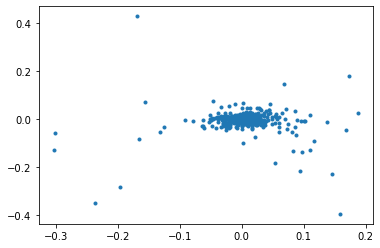

In [26]:
plt.plot(pca.components_[0, :], pca.components_[1, :], '.')  

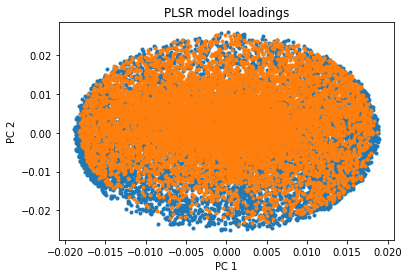

In [29]:
pls = PLSRegression(n_components = 2)
pls.fit_transform(df_tpm.iloc[:,:10000], df_counts.iloc[:,:10000]) #fit tpm vs counts

plt.title("PLSR model loadings")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.plot(pls.x_loadings_[:,0], pls.x_loadings_[:,1], '.')
plt.plot(pls.y_loadings_[:,0], pls.y_loadings_[:,1], '.')

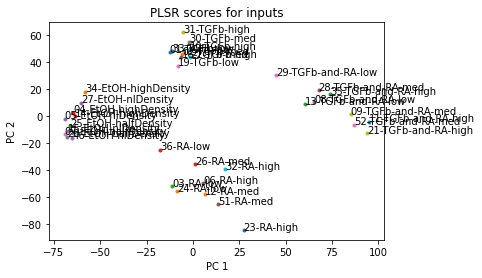

In [34]:
plt.title("PLSR scores for inputs")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
for i in range (0, 37):
    plt.plot(pls.x_scores_[i,0], pls.x_scores_[i,1], '.')

for i in range (0, 37):
    plt.annotate(sampleIDList[i],(pls.x_scores_[i,0], pls.x_scores_[i,1]))
#plt.plot(pls.x_scores_[:,0], pls.x_scores_[:,1], '.')
#plt.plot(pls.y_scores_[:,0], pls.y_scores_[:,1], '.')

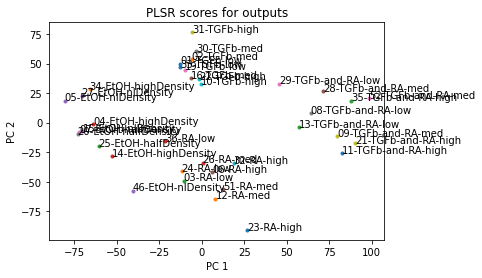

In [35]:
plt.title("PLSR scores for outputs")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
for i in range (0, 37):
    plt.plot(pls.y_scores_[i,0], pls.y_scores_[i,1], '.')

for i in range (0, 37):
    plt.annotate(sampleIDList[i],(pls.y_scores_[i,0], pls.y_scores_[i,1]))

In [32]:
print(pls.x_scores_.shape)
print(pls.y_scores_.shape)
print(pls.x_loadings_.shape)
print(pls.y_loadings_.shape)

(37, 2)
(37, 2)
(10000, 2)
(10000, 2)
